In [27]:
import random
import pandas as pd

factor=0.05

df = pd.DataFrame(columns=['diff', 'time', 'res',  'mal', 'norm_score'])

def logic(factor,res,i,j,k,l):
    lst=[]
    if(res==1):
        mal=random.uniform(0,75)
        lst.append(mal)
        if(mal<35):
            norm=diff+diff*factor*i
        elif mal>35:
            norm=diff+diff*factor*j
        lst.append(norm)
    elif res==0:
        mal=random.uniform(0,75)
        lst.append(mal)
        if(mal<35):
            norm=diff+diff*factor*k
        elif mal>35:
            norm=diff+diff*factor*l
        lst.append(norm)
    
    return lst



count=0
while(count<10000):
    diff=random.uniform(35,80)
    if(count<2000):
        a=2
        b=12
        l=1
        m=2
        n=-1
        o=1
    elif count<4000:
        a=13
        b=24
        l=1
        m=2
        n=-1
        o=1
    elif count<6000:
        a=25
        b=36
        l=1
        m=2
        n=-1
        o=1
    elif count<8000:
        a=37
        b=48
        l=1
        m=2
        n=-2
        o=1
    else:
        a=49
        b=100
        l=1
        m=3
        n=-2
        o=1
    time=random.randint(a,b)
    res=random.randint(0,1)
    lst=logic(factor,res,l,m,n,o)
    mal=lst[0]
    norm_score=lst[1]
    new_row={'diff': diff, 'time': time, 'res': res,'mal': mal, 'norm_score': norm_score}
    # df.append(new_row, ignore_index=True)
    df=pd.concat([df,pd.DataFrame([new_row])], ignore_index=True)

    count+=1
    



In [28]:
df.head(50)

,diff,time,res,mal,norm_score
0,47.120059,5,0,7.115853,44.764056
1,53.358695,7,0,36.881549,56.026630
2,62.955294,2,1,14.326958,66.103059
3,72.925364,8,1,8.118301,76.571633
4,36.390741,11,0,61.631848,38.210278
5,79.667845,5,1,19.269170,83.651237
6,67.533443,9,1,31.249528,70.910116
7,73.466098,7,1,52.195190,80.812707
8,41.367219,2,0,3.818737,39.298858
9,73.690643,9,0,9.010029,70.006111


In [29]:
df.to_csv('Flask app/Difficulty_Normalisation.csv',index=False)

In [30]:

# Time	Res	Mal	Norm Diff
			
# 1	1	1	2
# 1	1	0	1
# 1	0	1	1
# 1	0	0	-1
# 2	1	1	2
# 2	1	0	1
# 2	0	1	1
# 2	0	0	-1
# 3	1	1	2
# 3	1	0	1
# 3	0	1	1
# 3	0	0	-1
# 4	1	1	2
# 4	1	0	1
# 4	0	1	1
# 4	0	0	-2
# 5	1	1	3
# 5	1	0	1
# 5	0	1	1
# 5	0	0	-2


In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assume X is your dataframe with columns diff, mal, time, res, and norm_score

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

data = pd.read_csv('Flask app/Difficulty_Normalisation.csv')

# Assume X is your dataframe with columns diff, mal, time, res, and norm_score
X = data.copy()
# Scale the numerical features diff and mal between 0 and 1
X[['diff_scaled', 'mal_scaled']] = scaler.fit_transform(X[['diff', 'mal']])

# Scale the time feature between 0 and 1
X['time_scaled'] = X['time'] / 100.0

# The res column does not need scaling as it's already in the range [0, 1]

# Concatenate the scaled features and the binary res column
X_scaled = pd.concat([X[['diff_scaled', 'mal_scaled', 'time_scaled', 'res']], X['norm_score']], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled[['diff_scaled', 'mal_scaled', 'time_scaled', 'res']], 
                                                    X_scaled['norm_score'], 
                                                    test_size=0.2, 
                                                    random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.037646621844678554
R-squared: 0.9998037858562421


In [32]:
X_scaled

,diff_scaled,mal_scaled,time_scaled,res,norm_score
0,0.269266,0.094844,0.05,0,44.764056
1,0.407937,0.491744,0.07,0,56.026630
2,0.621249,0.190998,0.02,1,66.103059
3,0.842862,0.108211,0.08,1,76.571633
4,0.030777,0.821768,0.11,0,38.210278
...,...,...,...,...,...
9995,0.339634,0.551009,0.54,0,52.800105
9996,0.327849,0.681268,0.66,1,57.218955
9997,0.930169,0.297239,0.59,0,69.167875
9998,0.331140,0.603536,0.89,0,52.398870


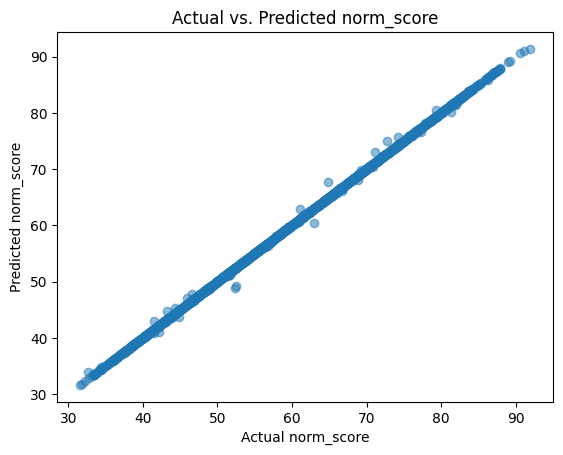

In [33]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual norm_score')
plt.ylabel('Predicted norm_score')
plt.title('Actual vs. Predicted norm_score')
plt.show()


In [34]:
# import joblib

# model_filename = 'difficulty_prediction_model.pkl'
# joblib.dump(rf_regressor, model_filename)
# # joblib.dump(scaler, 'min_max_scaler.pkl')
# with open('min_max_scaler.pkl', 'wb') as f:
#     joblib.dump(scaler, f)

In [35]:
from pickle import dump,load

dump(rf_regressor, open('Flask app/difficulty_prediction_model.pkl', 'wb'))
dump(scaler, open('Flask app/min_max_scaler.pkl', 'wb'))

In [36]:
model = load(open('difficulty_prediction_model.pkl', 'rb'))
# load the scaler
scaler = load(open('min_max_scaler.pkl', 'rb'))

In [37]:
type(scaler)

numpy.ndarray

In [38]:
# Assume 'user_input' contains the features for the single row
# 'user_input' should be a dictionary or a DataFrame with keys/columns: diff_scaled, mal_scaled, time_scaled, res

# Convert the user input to a DataFrame
user_input = {
    'diff': 40,
    'mal': 60,
    'time': 10,
    'res': 1
}

user_input_df = pd.DataFrame([user_input])

# Scale the features for the user input
user_input_df[['diff_scaled', 'mal_scaled']] = scaler.transform(user_input_df[['diff', 'mal']])
user_input_df['time_scaled'] = user_input_df['time'] / 100.0

# Extract the features for prediction
features_for_prediction = user_input_df[['diff_scaled', 'mal_scaled', 'time_scaled', 'res']]

# Predict using the trained Random Forest Regressor
predicted_norm_score = rf_regressor.predict(features_for_prediction)

# Print the predicted normalized score
print("Predicted Normalized Score:", predicted_norm_score[0])


AttributeError: 'numpy.ndarray' object has no attribute 'transform'